# Proyecto

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataSet = np.load('proyecto_training_data.npy')

In [3]:
dataP = dataSet[:int(len(dataSet)*0.8)]
dataA = dataSet[int(len(dataSet)*0.8):]
print(len(dataSet))
print(len(dataP))
print(len(dataA))
df = pd.DataFrame(dataP, columns = ['X0','X1','X2','X3','X4','X5'])
dfA = pd.DataFrame(dataA, columns = ['X0','X1','X2','X3','X4','X5'])
#print(df)
#dfA.describe()

1460
1168
292


In [ ]:
print(df)


**Media de cada variable:**

In [4]:
#print(df.iloc[:,[0]])
median = np.mean(df)
print(median[0],median[1],median[2],median[3],median[4],median[5])


180590.27739726027 6.101027397260274 1156.3236301369864 6.4854452054794525 1971.451198630137 69.94698544698545


**Valor máximo**

In [5]:
maximum = np.amax(df)
for i in range (len(maximum)) :
    print(maximum[i])

755000.0
10.0
3228.0
14.0
2010.0
313.0


**Valor mínimo**

In [6]:
minimum = np.amin(df)
print(minimum)

X0    34900.0
X1        1.0
X2      334.0
X3        2.0
X4     1875.0
X5       21.0
dtype: float64


**Rangos**  
Reemplazar los valores NAN con "0" de cada columna:

In [ ]:
#df['X5'] = df['X5'].fillna(0)
#df['X5'] = df['X5'].replace(np.nan, 0) #no me funciono el otro

In [7]:
ranges = []
#print(df.iloc[:,[0]])
for i in range(len(df.count())):
        ranges.append(np.ptp(df.iloc[:,[i]]))
print(ranges)

[720100.0, 9.0, 2894.0, 12.0, 135.0, nan]


**Desviacion estandar**

In [8]:
stdDf = df.std()
print(stdDf)

X0    78815.697902
X1        1.378025
X2      373.780374
X3        1.609141
X4       29.951707
X5       23.478161
dtype: float64


## **Histograma de Variables**

In [9]:
import seaborn as sns

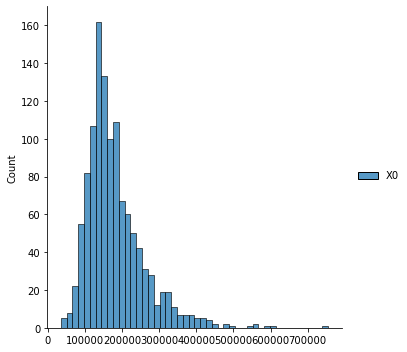

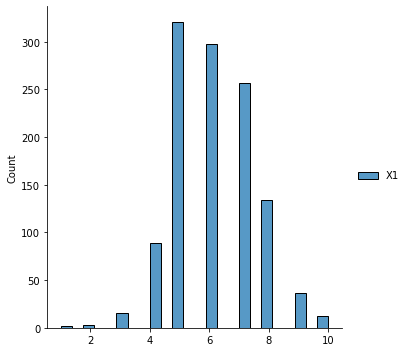

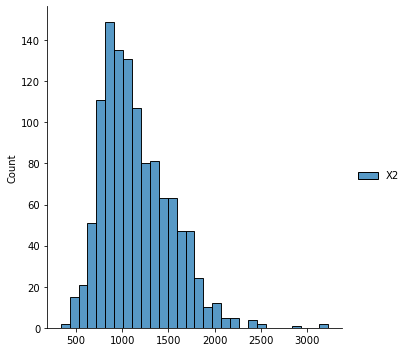

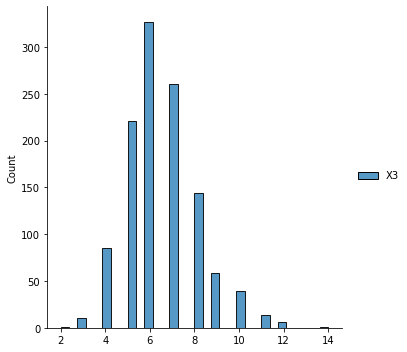

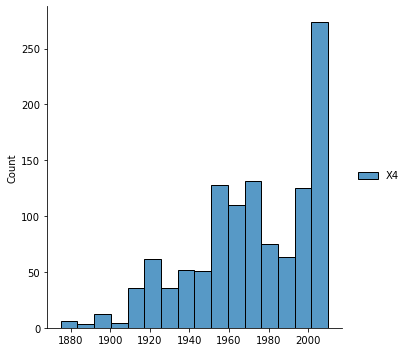

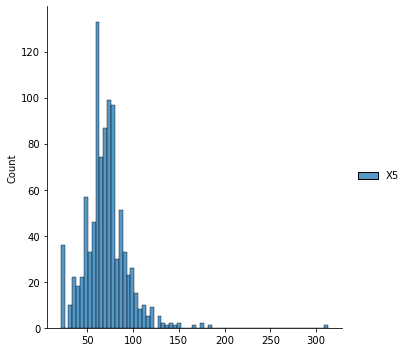

In [10]:
#ax = sns.displot(df.iloc[:,['X0']])
for i in range(len(df.count())):
    ax = sns.displot(df.iloc[:,[i]])

In [ ]:
print("df")

**Calculo de coeficiente de correlacion entre Xi y Y**

$$r_i = {\frac{\sum(x-\hat{x})(y-\hat{y})}{\sqrt{\sum(x-\hat{x})^2}\sqrt{\sum(y-\hat{y})^2}}} $$

In [22]:
corrcoef = []
corrcoef.append(df['X0'].corr(df['X1']))
corrcoef.append(df['X0'].corr(df['X2']))
corrcoef.append(df['X0'].corr(df['X3']))
corrcoef.append(df['X0'].corr(df['X4']))
corrcoef.append(df['X0'].corr(df['X5']))

print(corrcoef)

[0.7939900504626405, 0.6162887000998717, 0.5647069399593065, 0.5341706927117515, 0.363291616653892]


<Figure size 432x288 with 0 Axes>

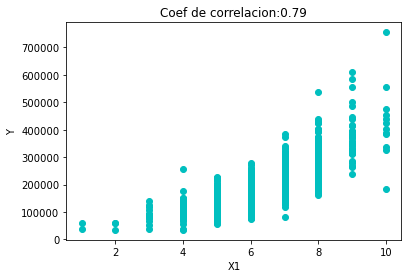

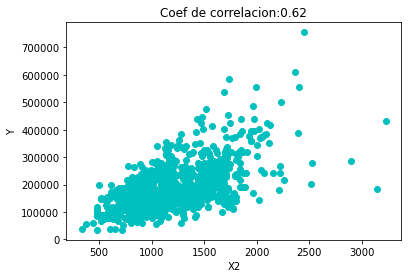

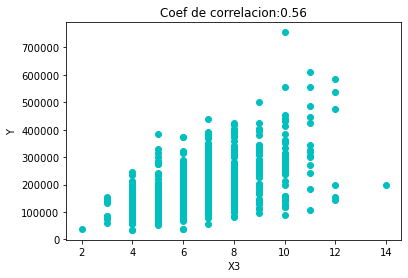

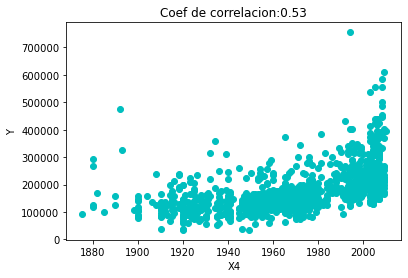

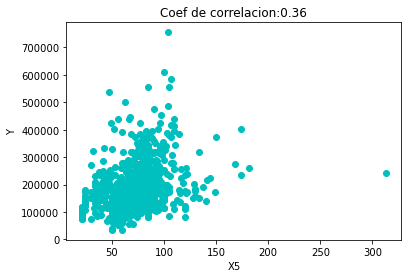

In [23]:
fig = plt.figure()

for i in range(1,6):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(df.iloc[:,[i]], df.iloc[:,[0]],color="c") 
    ax.set_xlabel('X'+str(i))
    ax.set_ylabel('Y')
    ax.set_title("Coef de correlacion:"+str(round(corrcoef[i-1],2)))
    plt.show()

    

## **Función para entrenar un modelo de regresión lineal de una variable**
\begin{equation*}
\ y = mx + b
\end{equation*}

In [24]:
#print(dfA["X5"].values)
dfA['X5'] = dfA['X5'].fillna(0)
#print(dfA["X5"].values)
print("")


In [25]:
def validarError(lista,error):
    #print("Validando error",error,lista[-1])
    #print(lista[-1],error,error- lista[-1])
    if error  > lista[-2]:
        print("El error aumento!",lista[-2],error,error - lista[-2] )
        return True
    return False

In [26]:
def regresionLineal(x,y,epochs,impErrCad,lr,params,varX):
    #varX = "X"+str(varX)
    #matriz X
    matX = np.full((len(x),2),1)
    matX[:,0] = x 
    
    #matriz Y
    matY = np.full((len(y),2),1)
    matY[:,0] = y 
    
    #vector y_hat
    #y_hat = np.matmul(matX,param) #no funciono
    y_hat = x*params[0]+params[1]
    
    #error
    error = (np.power((y_hat-y),2))/2
    errorPromedio = np.mean(error)
    
    #gradiente M
    gradienteM = (y_hat - y)*x
    gradPromM = np.mean(gradienteM)#valor promedio del gradiente de M
    
    #gradiente B
    gradienteB = (y_hat - y)*1
    gradPromB = np.mean(gradienteB)#valor promedio del gradiente de B
    
    nuevaM = round(params[0] - lr *gradPromM,6) #nuevo valor de la pendiente M
    nuevaB = round(params[1] - lr *gradPromB,6) #nuevo valor del intercepto B 
    
    #agregar la informacion a un diccionario o lista
    if varX in listaErrores:
        
        listaErrores[varX].append(errorPromedio)#agrego el error en cada iteracion
        
        modeloLineal[varX].append((nuevaM,nuevaB))#agrego el modelo lineal en cada iteraccion
        
        listErrores = listaErrores.get(varX)
        
        if validarError(listErrores,errorPromedio) == True: #se valida si el error converge o es mayor al anterior para terminar
            print("El error aumento, termina el entrenamiento")
            print("******************** FIN EPOCHS %s******************"%epochs,varX)
            return params[0], params[1], True
        
    else:
        listaErrores[varX] = [errorPromedio]
        modeloLineal[varX] = [(nuevaM,nuevaB)]
        
    
    #imprimir informacion del modelo
    if  epochs % impErrCad == 0 :
        print("******************** INI EPOCHS %s******************"%epochs,varX)
        print("Parametros",params)
        #print("Y_hat",y_hat)
        #print("ERROR:",error)
        print("ERROR Promedio:",errorPromedio)
        print("GradienteM:",gradPromM)
        print("GradienteB:",gradPromB)
        print("******************** FIN EPOCHS %s******************"%epochs)
    
    return nuevaM,nuevaB,False

In [27]:
#funcion para limpiar los datos del modelo en la estructura
def limpiarDatosModeloYError(key):
    if key in modeloLineal:
        modeloLineal.pop(key)
    if key in listaErrores:
        listaErrores.pop(key)
    

In [28]:
#estructuras de datos para almacenar el modelo
listaErrores = {}
modeloLineal = {}

#esta funcion recibe como parametros

def funcionLineal(vecX,vecY,epochs,imprimirErrorCada,lr,m,b,key):
    
    #print("ANTES",modeloLineal)
    limpiarDatosModeloYError(key)
    #print("DESPUES",modeloLineal)
    
    err = 0
    
    for i in range (epochs):
        params = np.array((m,b))
        m,b,err = regresionLineal(vecX,vecY,i,imprimirErrorCada,lr,params,key)
        #Si la variable err biene True se detiene ya que el modelo termino
        if err == True:
            print("forced exit!")
            break
        #modeloLineal["X"+str(varX)]= {"m":m,"b":b}

            
#funcionLineal(15000,1000,0.01,0,0)    


## **Entrenando Modelo Lineal para X1 y X3**

In [56]:
#VALOR DE Y
Y = df['X0'].values
#entrenado X1 
X1 = df['X1'].values
funcionLineal(X1,Y,5000,500,0.0001,0,0,'X1')
print(modeloLineal['X1'][-1])

******************** INI EPOCHS 0****************** X1
Parametros [0 0]
ERROR Promedio: 19409722053.22175
GradienteM: -1187947.67380137
GradienteB: -180590.27739726027
******************** FIN EPOCHS 0******************
******************** INI EPOCHS 500****************** X1
Parametros [25684.700143  3765.693632]
ERROR Promedio: 1718542107.200786
GradienteM: -160191.1226407637
GradienteB: -20121.5245024024
******************** FIN EPOCHS 500******************
******************** INI EPOCHS 1000****************** X1
Parametros [29166.477475  4065.062809]
ERROR Promedio: 1398293276.9602356
GradienteM: -22158.010817950344
GradienteB: 1420.263568289382
******************** FIN EPOCHS 1000******************
******************** INI EPOCHS 1500****************** X1
Parametros [29666.24223   3899.379522]
ERROR Promedio: 1391378096.8930082
GradienteM: -3618.1203365308625
GradienteB: 4303.6587437294465
******************** FIN EPOCHS 1500******************
******************** INI EPOCHS 2000

In [34]:
#entrenado X3     
X3 = df['X3'].values
funcionLineal(X3,Y,100,20,0.001,0,0,'X3')
print(modeloLineal['X3'][-1])

******************** INI EPOCHS 0****************** X3
Parametros [0 0]
ERROR Promedio: 19409722053.22175
GradienteM: -1242766.2979452056
GradienteB: -180590.27739726027
******************** FIN EPOCHS 0******************
******************** INI EPOCHS 20****************** X3
Parametros [16538.977608  2402.263344]
ERROR Promedio: 4788844534.915882
GradienteM: -488752.35264521226
GradienteB: -70925.38102192465
******************** FIN EPOCHS 20******************
******************** INI EPOCHS 40****************** X3
Parametros [23043.481841  3345.099346]
ERROR Promedio: 2527598519.0472493
GradienteM: -192223.7790477234
GradienteB: -27797.939227994
******************** FIN EPOCHS 40******************
******************** INI EPOCHS 60****************** X3
Parametros [25601.761769  3713.993353]
ERROR Promedio: 2177876778.8220234
GradienteM: -75608.95707144178
GradienteB: -10837.460927672084
******************** FIN EPOCHS 60******************
******************** INI EPOCHS 80**********

In [35]:
#listaErrores["j"]= 5
print(listaErrores.keys())

dict_keys(['X1', 'X3'])


## **Graficando los errores**

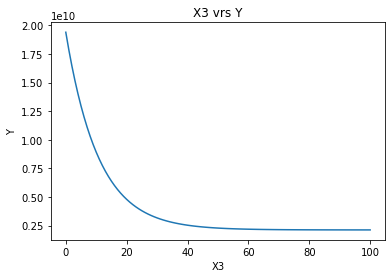

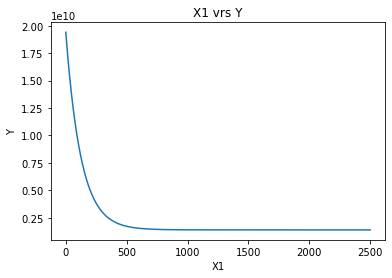

In [43]:
for key,value in listaErrores.items():
    print("")
    #graficarErrores(key,value)
    
    vecY = np.linspace(0,len(value),len(value),dtype="int")
    #print(key,value)
    #print(vecY)
    
    plt.plot(vecY,value)
  
    # naming the x axis
    plt.xlabel(key)
    # naming the y axis
    plt.ylabel('Y')

    # giving a title to my graph
    plt.title('%s vrs Y'%key)

    # function to show the plot
    plt.show()
    
    

In [31]:
def showLineGraph(vecY,vecX,y_real,title):
    
    plt.scatter(vecX, y_real,  color='black')
    plt.plot(vecX,vecY)

    # naming the x axis
    plt.xlabel('X')
    # naming the y axis
    plt.ylabel('Y')

    # giving a title to my graph
    plt.title(title)

    # function to show the plot
    plt.show()

In [32]:
def graficarErrores(xAxis,listaErrores):
    vecY = np.linspace(0,len(listaErrores),len(listaErrores),dtype="int")
    #print(key,value)
    #print(vecY)

    plt.plot(vecY,listaErrores)

    # naming the x axis
    plt.xlabel(xAxis)
    # naming the y axis
    plt.ylabel('Y')

    # giving a title to my graph
    plt.title('%s vrs Y'%key)

    # function to show the plot
    plt.show()
    

## **Evolución del modelo entrenado en el tiempo**

In [44]:
def graphYAlongTime(modelHistory, n, vecX, y_real):
    #print("MODELO LINEAL:",modelHistory)
    for index, modelo in enumerate(modelHistory):
        if index % n == 0:
            m,b = modelo
            #print("index:",index,"modelo:",modelo[0],modelo[1],"VEC X:",vecX)
            y_hat = m * vecX  + b
            #print(y_hat,y_real)
            showLineGraph(y_hat,vecX,y_real, "y = "+str(m)+ " * X + "+str(b))
    

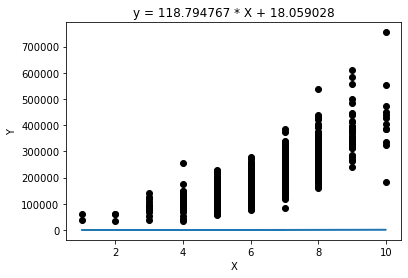

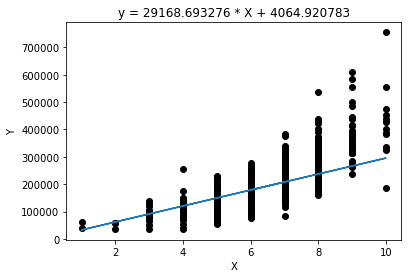

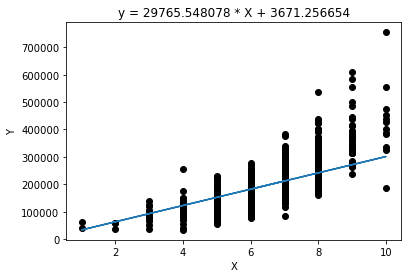

In [45]:
graphYAlongTime(modeloLineal['X1'],1000,df['X1'].values,df['X0'].values)

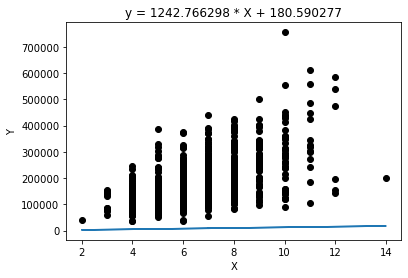

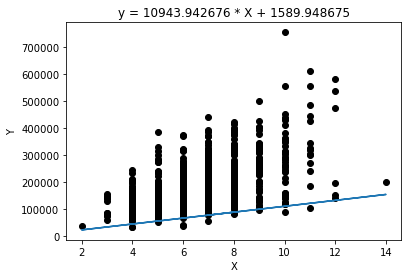

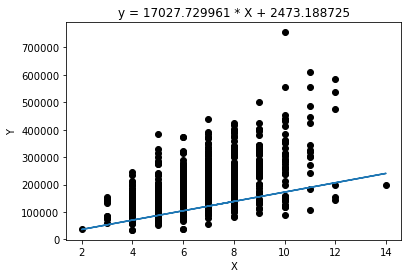

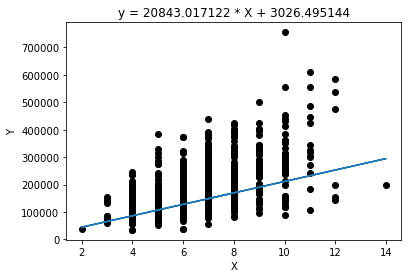

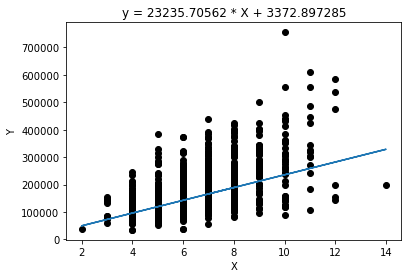

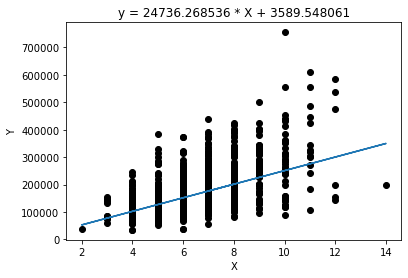

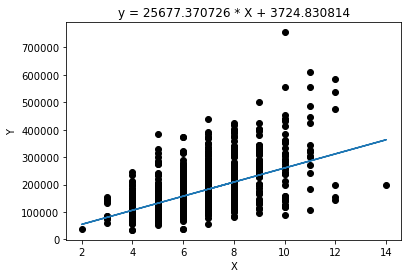

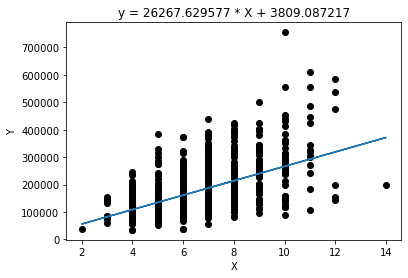

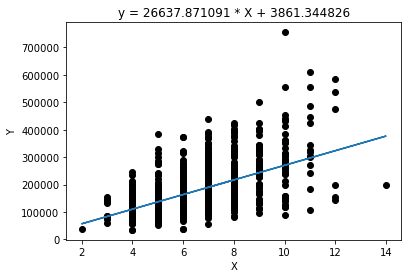

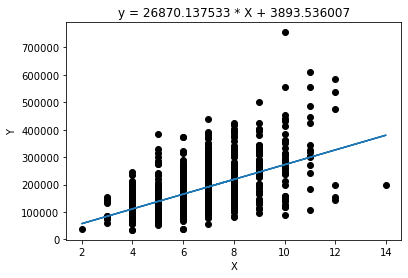

In [46]:
graphYAlongTime(modeloLineal['X3'],10,df['X3'].values,df['X0'].values)

## Usando Scikit Learn


In [47]:
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split

In [48]:
#funcion que retorna el modelo por llave, eje X1,X3, etc, ya tienen que haber sido entrenados
def returnManualModelByKey(key):
    if key in modeloLineal:
        return modeloLineal[key][-1]
    else:
        return ((0,0))
        

In [49]:
colors = ['b','g','r']

def graficarError(errores):
    print(errores)
    
    #langs = ['errMan', 'errScit', 'errProm']
    
    X = np.arange(1)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar("errMan", errores[0], color = 'b', width = 0.25)
    ax.bar("errSckt", errores[1], color = 'g', width = 0.25)
    ax.bar("errProm", errores[2], color = 'r', width = 0.25)
    
    for index,data in enumerate(errores):
        plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))
        
    ax.grid(zorder=0)


In [50]:
#funcion que utiliza el scikitLearn para retornar un modelo linal, recibe la variable X y Y
def returnLinerModelWithScikit(vecX,vecY):
    X = np.reshape(vecX,(-1,1))

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X, Y)
    
    return regr.coef_,regr.intercept_


In [ ]:
m,b = returnLinerModelWithScikit(df['X1'].values,df['X0'].values)
print(m[0],b)

## **Predicción de los modelos, manual y scikit**

In [51]:
#funcion que recibe 2 vectores y retonar su error
def calcularErrorEntreDosVec(vec1,vec2):
    diff = vec1 - vec2
    diff = np.power(diff,2)/2
    return np.mean(diff)

In [52]:
def returnPrediccion(modeloManual,  modeloScikit, vectorX):
    yManual = evaluarModeloLineal(vectorX, modeloManual)
    yScikit = evaluarModeloLineal(vectorX, modeloScikit)
    yProm = (yManual+yScikit)/2 #promedio de la evaluacion de ambas
    
    return yManual,yScikit,yProm

In [53]:
#retornamos Y evaluado en el modelo enviado
def evaluarModeloLineal(vecX, modelo):
    m,b = modelo[0],modelo[1]
    y_hat =  m * vecX  + b
    return y_hat

## **Modelo Lineal para X1**

Modelo Manual (29810.754478, 3436.232715)
Modelo Scikit (array([45411.99877916]), -96469.57131873982)
[1.56016659e+09 1.31509130e+09 1.37482144e+09]


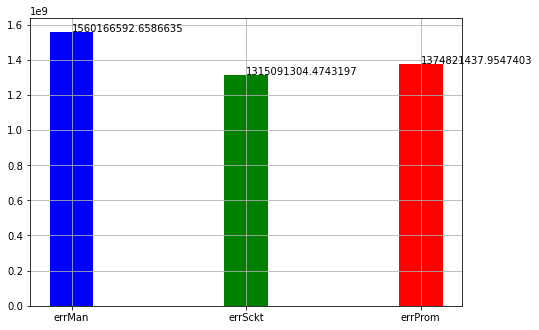

In [54]:
modeloManual = returnManualModelByKey('X1')#np.array(modeloLineal['X1'][-1])
modeloScikit = returnLinerModelWithScikit(df['X1'].values,df['X0'].values)

print("Modelo Manual",modeloManual)
print("Modelo Scikit",modeloScikit)

#print(type(modeloLineal['X1'][-1]))
predicciones = returnPrediccion(modeloManual, modeloScikit, dfA['X1'].values)

#print(predicciones[0])
#print(predicciones[1])
#print(predicciones[2])

vecY = dfA['X0'].values 

errorManual = calcularErrorEntreDosVec(vecY,predicciones[0])
errorScikit = calcularErrorEntreDosVec(vecY,predicciones[1])
errorProm = calcularErrorEntreDosVec(vecY,predicciones[2])
graficarError(np.array((errorManual,errorScikit,errorProm)))

## **Modelo Lineal para X3**

(27004.165708, 3911.599022)
(array([27659.34100204]), 1207.1369088349456)
[2.82196258e+09 2.83801571e+09 2.82949666e+09]


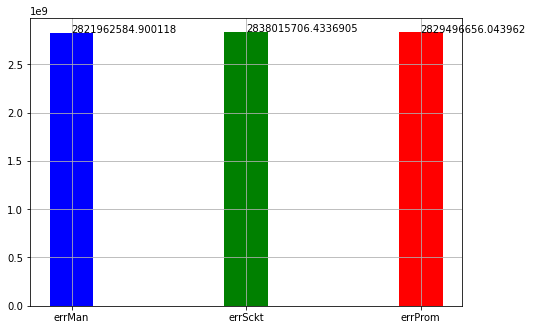

In [55]:
modeloManual = returnManualModelByKey('X3')#np.array(modeloLineal['X1'][-1])
modeloScikit = returnLinerModelWithScikit(df['X3'].values,df['X0'].values)
print(modeloManual)
print(modeloScikit)

#print(type(modeloLineal['X1'][-1]))
predicciones = returnPrediccion(modeloManual, modeloScikit, dfA['X3'].values)

#print(predicciones[0])
#print(predicciones[1])
#print(predicciones[2])

vecY = dfA['X0'].values 

errorManual = calcularErrorEntreDosVec(vecY,predicciones[0])
errorScikit = calcularErrorEntreDosVec(vecY,predicciones[1])
errorProm = calcularErrorEntreDosVec(vecY,predicciones[2])
graficarError(np.array((errorManual,errorScikit,errorProm)))